In [4]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [5]:
class QuadState(TypedDict):

    a:int
    b:int
    c:int

    equation:str
    d:int
    res:str
    

In [6]:
def show_equation(state:QuadState):

    equation = f"{state['a']}x2 {state['b']}x {state['c']} "
    return {"equation":equation}


def calculate_d(state:QuadState):

    d = state['b']**2 - 4*state['a']*state['c']
    return {"d":d}

def real_roots(state: QuadState):

    root1 = (-state["b"] + state["d"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["d"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'res': result}

def repeated_roots(state: QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'res': result}

def no_real_roots(state: QuadState):

    result = f'No real roots'

    return {'res': result}

def check_condition(state: QuadState) -> Literal["real_roots","repeated_roots","no_real_roots"]:

    if state['d'] > 0:
        return "real_roots"
    elif state['d'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"
    
    

In [7]:
graph = StateGraph(QuadState)

graph.add_node("show_equation",show_equation)
graph.add_node("calculate_d",calculate_d)
graph.add_node("real_roots",real_roots)
graph.add_node("repeated_roots",repeated_roots)
graph.add_node("no_real_roots",no_real_roots)

graph.add_edge(START,"show_equation")
graph.add_edge("show_equation","calculate_d")

#important in this 
graph.add_conditional_edges("calculate_d",check_condition)
graph.add_edge("real_roots",END)
graph.add_edge("repeated_roots",END)
graph.add_edge("no_real_roots",END)

workflow = graph.compile()

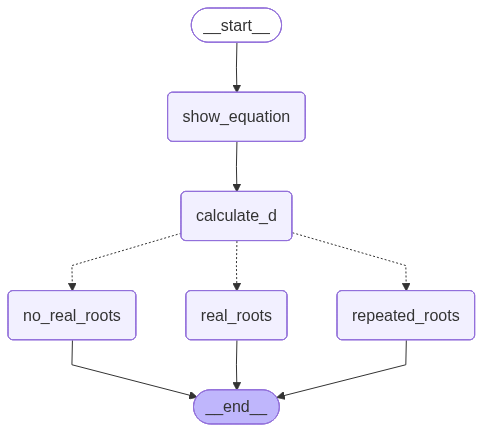

In [8]:
workflow

In [9]:
initial_state = {
    "a":1,
    "b":-2,
    "c":1
}

final_state = workflow.invoke(initial_state)

final_state

{'a': 1,
 'b': -2,
 'c': 1,
 'equation': '1x2 -2x 1 ',
 'd': 0,
 'res': 'Only repeating root is 1.0'}